In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

movie_metadata.csv



In [2]:
df = pd.read_csv('../input/movie_metadata.csv')

In [3]:
df.color.unique()

array(['Color', nan, ' Black and White'], dtype=object)

In [4]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

 - Group by director and get total turnover
 - Select top 20 directors by revenues
    
    



In [5]:
df_gross = df.groupby('director_name')['gross'].sum()
df_gross.sort_values(ascending=False).head(20)

director_name
Steven Spielberg     4.114233e+09
Peter Jackson        2.592969e+09
Michael Bay          2.231243e+09
Tim Burton           2.071275e+09
Sam Raimi            2.049549e+09
James Cameron        1.948126e+09
Christopher Nolan    1.813228e+09
George Lucas         1.741418e+09
Joss Whedon          1.730887e+09
Robert Zemeckis      1.619309e+09
Chris Columbus       1.618708e+09
Jon Favreau          1.562382e+09
Clint Eastwood       1.378321e+09
Ron Howard           1.362892e+09
Francis Lawrence     1.358502e+09
Ridley Scott         1.337772e+09
Gore Verbinski       1.329601e+09
Shawn Levy           1.177562e+09
Andrew Adamson       1.149943e+09
Zack Snyder          1.149193e+09
Name: gross, dtype: float64

 - Group by actors and get total turnover
 - Select top 20 actors by revenues

In [6]:
df_gross_actor1 = df.groupby('actor_1_name')['gross'].sum()
df_gross_actor1.sort_values(ascending=False).head(20)

actor_1_name
Johnny Depp           3.719618e+09
Harrison Ford         3.391556e+09
Tom Hanks             3.264559e+09
Tom Cruise            2.987622e+09
J.K. Simmons          2.856407e+09
Will Smith            2.762618e+09
Chris Hemsworth       2.729133e+09
Leonardo DiCaprio     2.640582e+09
Robert Downey Jr.     2.456990e+09
Jennifer Lawrence     2.367856e+09
Robin Williams        2.297193e+09
Steve Buscemi         2.118443e+09
Robert De Niro        2.100745e+09
Bruce Willis          2.010943e+09
Denzel Washington     1.896762e+09
Matt Damon            1.859179e+09
Robert Pattinson      1.841497e+09
Morgan Freeman        1.780515e+09
Hugh Jackman          1.713314e+09
Scarlett Johansson    1.702026e+09
Name: gross, dtype: float64

View a single row

In [7]:
df.ix[10,:]

color                                                                    Color
director_name                                                      Zack Snyder
num_critic_for_reviews                                                     673
duration                                                                   183
director_facebook_likes                                                      0
actor_3_facebook_likes                                                    2000
actor_2_name                                                      Lauren Cohan
actor_1_facebook_likes                                                   15000
gross                                                              3.30249e+08
genres                                                 Action|Adventure|Sci-Fi
actor_1_name                                                      Henry Cavill
movie_title                                Batman v Superman: Dawn of Justice 
num_voted_users                                     

 - Find out how movies are rated frequently
 - Chop movie ratings below 2
 - Count how many movies are rated ranging from 2 to 10

In [8]:
df_compressed_rating = df[df['imdb_score'] >=2 ]
df_compressed_rating.imdb_score.min()

2.0

In [9]:
df_groupby_ratings = df_compressed_rating.groupby(['imdb_score'])['movie_title'].count()

In [10]:
import matplotlib.pyplot as plt

In [11]:
%matplotlib inline

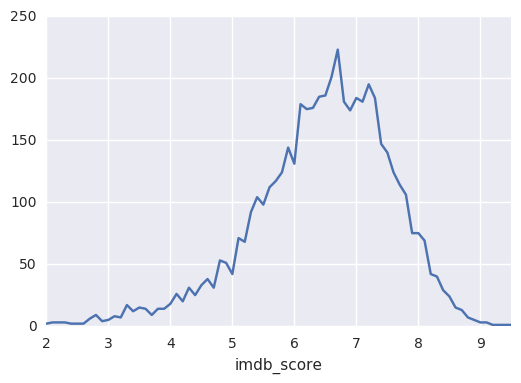

In [12]:
df_groupby_ratings.plot()

In [13]:
df_movies_year = df.groupby(['title_year'])['movie_title'].count()
df_movies_year.head()

title_year
1916.0    1
1920.0    1
1925.0    1
1927.0    1
1929.0    2
Name: movie_title, dtype: int64

Number of movies per year over the year

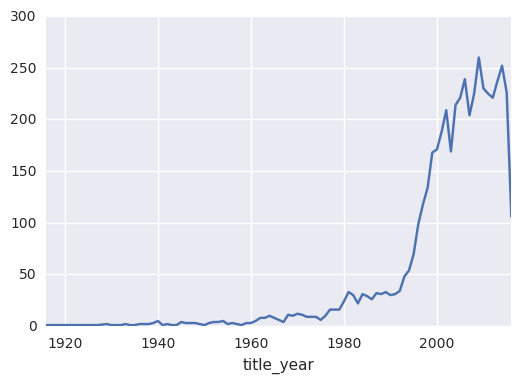

In [14]:
df_movies_year.plot('line')

Gross Revenue over the year

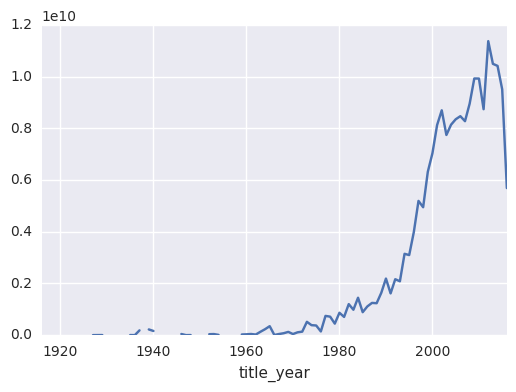

In [15]:
df_movies_year_gross = df.groupby(['title_year'])['gross'].sum()
df_movies_year_gross.plot()

Total budget for a movie over the years**strong text**

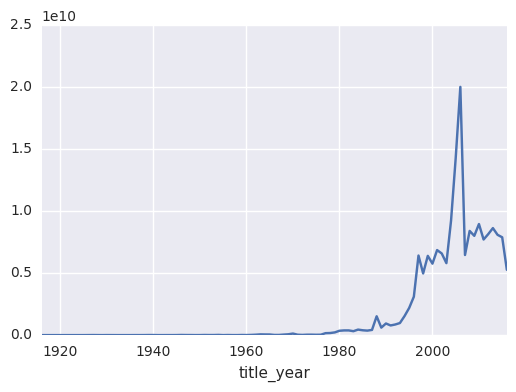

In [16]:
df_movies_year_budget = df.groupby(['title_year'])['budget'].sum()
df_movies_year_budget.plot()

Average turnover per movie over the year

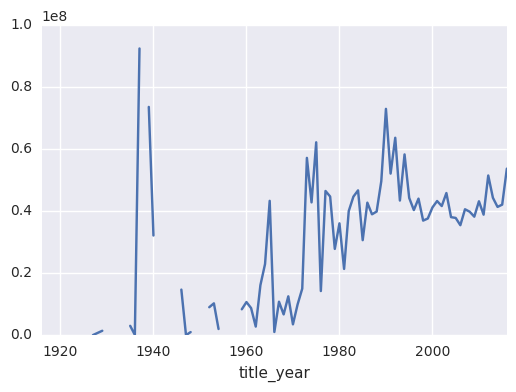

In [17]:
turnover_per_movie_year = df_movies_year_gross / df_movies_year
turnover_per_movie_year.plot()

Average budget of a movie over the year

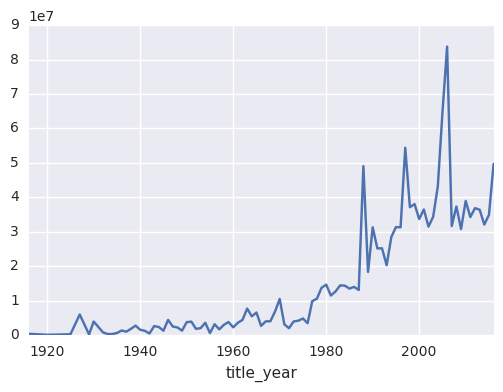

In [18]:
budget_per_movie_year = df_movies_year_budget / df_movies_year
budget_per_movie_year.plot()

Average turnover per movie post 1980

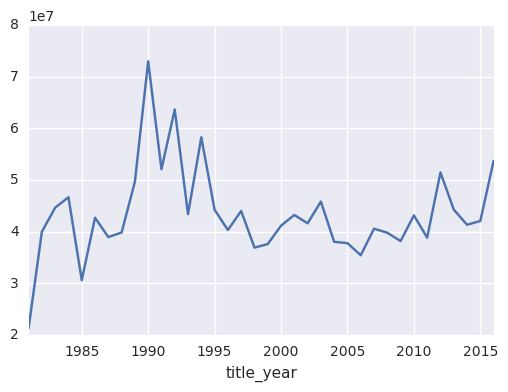

In [19]:
turnover_per_movie_year[turnover_per_movie_year.index > 1980].plot()

Average movie duration per year over the years

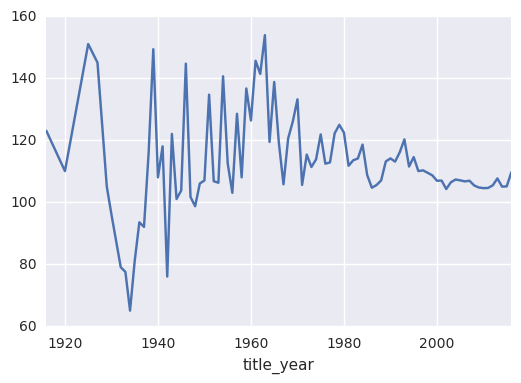

In [20]:
df_movies_year_duration = df.groupby(['title_year'])['duration'].sum()
df_movies_year_avg_duration = df_movies_year_duration / df_movies_year
df_movies_year_avg_duration.plot()

Movie length and Gross Revenue trend over the years

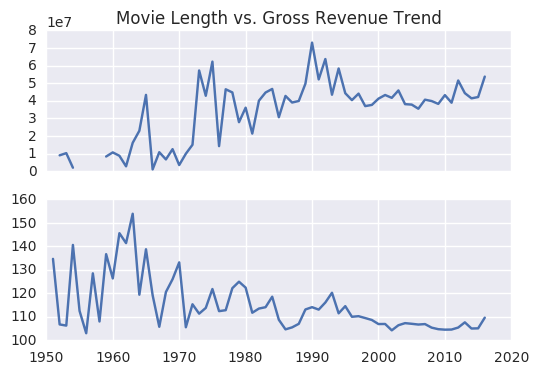

In [21]:
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(turnover_per_movie_year[turnover_per_movie_year.index > 1950])
axarr[0].set_title('Movie Length vs. Gross Revenue Trend')
axarr[1].plot(df_movies_year_avg_duration[df_movies_year_avg_duration.index > 1950])

Budget vs. Revenue trend over the years

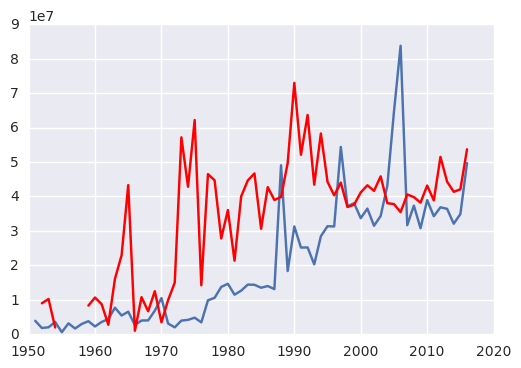

In [22]:
#f, axarr = plt.subplots(2, sharex=True)
plt.plot(budget_per_movie_year[budget_per_movie_year.index > 1950])
#axarr[0].set_title('Budget vs. Gross Revenue Trend')
plt.plot(turnover_per_movie_year[turnover_per_movie_year.index > 1950], 'r')

Movie profit trend over the years

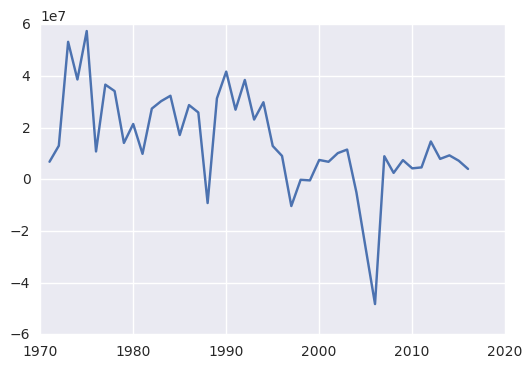

In [23]:
plt.plot(turnover_per_movie_year[turnover_per_movie_year.index > 1970]
         - budget_per_movie_year[turnover_per_movie_year.index > 1970])

 - sort by imdb scores
 - show top-rated movies in each group
 - show until imdb rating 8

In [24]:
df_highest_rate = df.sort_values(by = 'imdb_score', ascending=False)

In [25]:
g = df_highest_rate.groupby('imdb_score').apply(lambda x: x.head(2))
h = g.set_index('imdb_score').reset_index()

In [26]:
top_rated = h[h['imdb_score'] >= 8].sort_values(by = 'imdb_score', ascending = False)
top_rated = top_rated.dropna()
top_rated.loc[:,['movie_title', 'director_name', 'gross', 'actor_1_name', 'actor_2_name', 'imdb_score']]

,movie_title,director_name,gross,actor_1_name,actor_2_name,imdb_score
149,The Shawshank Redemption,Frank Darabont,28341469.0,Morgan Freeman,Jeffrey DeMunn,9.3
148,The Godfather,Francis Ford Coppola,134821952.0,Al Pacino,Marlon Brando,9.2
145,The Godfather: Part II,Francis Ford Coppola,57300000.0,Robert De Niro,Al Pacino,9.0
144,The Dark Knight,Christopher Nolan,533316061.0,Christian Bale,Heath Ledger,9.0
142,The Lord of the Rings: The Return of the King,Peter Jackson,377019252.0,Orlando Bloom,Billy Boyd,8.9
141,Forrest Gump,Robert Zemeckis,329691196.0,Tom Hanks,Siobhan Fallon Hogan,8.8
140,Fight Club,David Fincher,37023395.0,Brad Pitt,Meat Loaf,8.8
137,Se7en,David Fincher,100125340.0,Morgan Freeman,Brad Pitt,8.6
136,Saving Private Ryan,Steven Spielberg,216119491.0,Tom Hanks,Vin Diesel,8.6
135,Memento,Christopher Nolan,25530884.0,Callum Rennie,Thomas Lennon,8.5


 - sort by actor performance
 - take top-rated actors
 - Show their overall performance in terms of gross revenues

In [27]:
df_top_grossing_actors = df.groupby('actor_1_name')['gross'].mean()

In [28]:
df_top_grossing_actors.sort_values(ascending=False).head()

actor_1_name
Rupert Everett    436471036.0
Wayne Knight      356784000.0
Albert Finney     304360277.0
Steve Bastoni     281492479.0
Phaldut Sharma    274084951.0
Name: gross, dtype: float64

In [29]:
list(top_rated['actor_1_name'])

['Morgan Freeman',
 'Al Pacino',
 'Robert De Niro',
 'Christian Bale',
 'Orlando Bloom',
 'Tom Hanks',
 'Brad Pitt',
 'Morgan Freeman',
 'Tom Hanks',
 'Callum Rennie',
 'Tom Skerritt',
 'Kevin Spacey',
 'Nehemiah Persoff',
 'Kristen Stewart',
 'Ricardo Darín',
 'Sylvester Stallone',
 'Tom Cruise',
 'Natalie Portman']

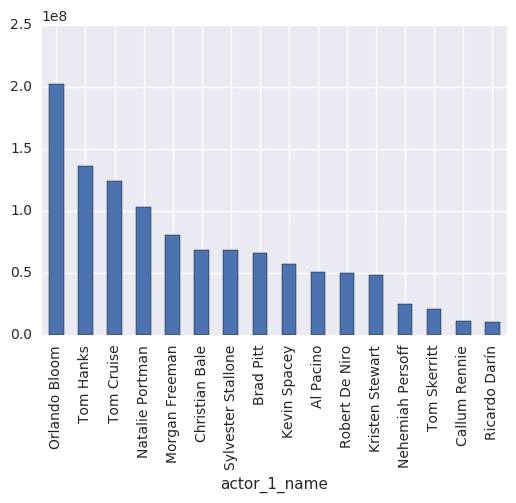

In [30]:
res = df_top_grossing_actors[df_top_grossing_actors.index.isin(list(top_rated['actor_1_name']))]
res.sort_values(ascending=False).plot('bar')

In [31]:
df_top_grossing_directors = df.groupby('director_name')['gross'].mean()
df_top_grossing_directors.sort_values(ascending=False).head()

director_name
Joss Whedon     432721657.0
Lee Unkrich     414984497.0
Chris Buck      400736600.0
Tim Miller      363024263.0
George Lucas    348283696.0
Name: gross, dtype: float64

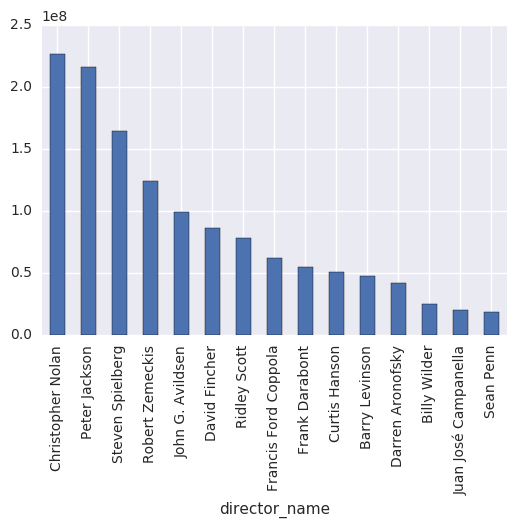

In [32]:
res_directors = df_top_grossing_directors[df_top_grossing_directors.index.isin(list(top_rated['director_name']))]
res_directors.sort_values(ascending=False).plot('bar')